In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

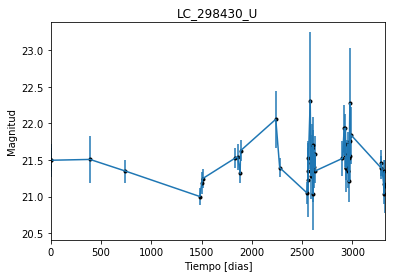

In [2]:
data = np.genfromtxt('LC_298430_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_298430_U')
plt.savefig("LC_298430_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

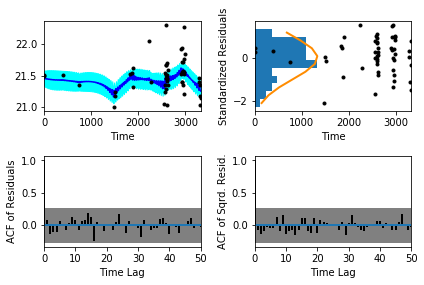

In [5]:
sample.assess_fit()

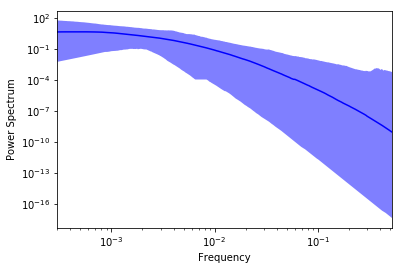

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

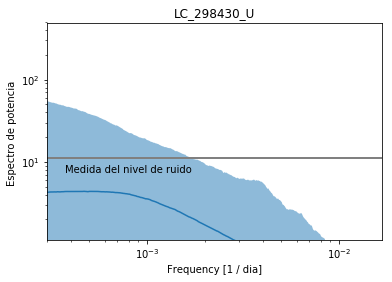

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_298430_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_298430_U')

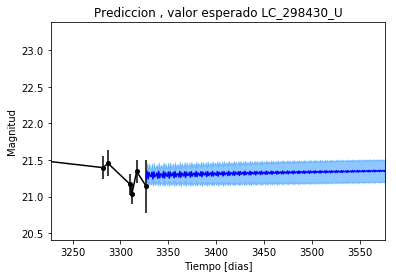

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_298430_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_298430_U')

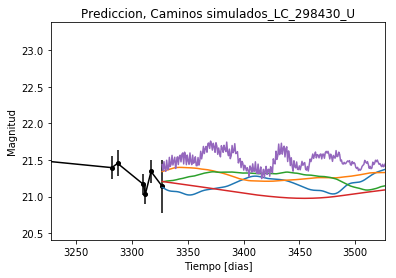

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_298430_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


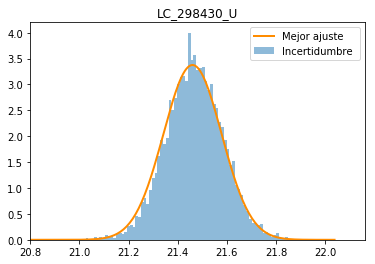

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_298430_U')
plt.savefig("Mejor_ajuste_LC_297623_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_297623_U')

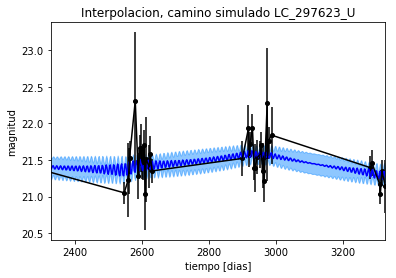

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_U')

Text(0.5,1,'Interpolacion, camino simulado LC_297623_U')

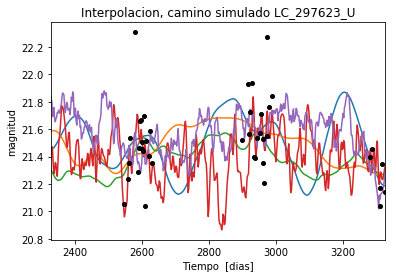

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 418.281555173
Median: 0.0107959886229
Standard deviation: 0.200917773643
68% credibility interval: [ 0.00086513  0.19261693]
95% credibility interval: [  3.48402021e-04   8.07267163e-01]
99% credibility interval: [  3.07636796e-04   9.56434676e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 596.652691089
Median: 0.00332983636576
Standard deviation: 0.116588993293
68% credibility interval: [ 0.00063893  0.04572087]
95% credibility interval: [  3.38071250e-04   4.13612151e-01]
99% credibility interval: [  3.06511500e-04   8.07541530e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 537.178997598
Median: 0.0286491694606


In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1261.42103545
Median: 26.8886038743
Standard deviation: 1.5238543296
68% credibility interval: [ 25.19184237  27.95379666]
95% credibility interval: [ 22.74302472  28.55445788]
99% credibility interval: [ 20.8325668   28.86921176]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 400.633873767
Median: 0.728006028827
Standard deviation: 2.51636417307
68% credibility interval: [ 0.07119611  4.32983955]
95% credibility interval: [ 0.01469687  8.31536641]
99% credibility interval: [  1.03299442e-02   1.35109954e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 250.658239668
Median: 0.884513363004
Standard deviation: 13.1817349262
68% credibility interval: [  0.02445454  13.80536893]
95% credibility interval: [  1

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20019.1467654
Median: 9.18155141158e-24
Standard deviation: 3.32680643837e+105
68% credibility interval: [  1.38682170e-81   4.16970863e+06]
95% credibility interval: [  1.00319617e-120   9.23579809e+064]
99% credibility interval: [  2.35963710e-128   1.16622666e+094]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2665.49242178
Median: 21.4120264946
Standard deviation: 0.0761732991417
68% credibility interval: [ 21.3455031   21.47636357]
95% credibility interval: [ 21.253631    21.55415134]
99% credibility interval: [ 21.15467347  21.62559651]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 881.846540647
Median: 0.0292025963524
Standard deviation: 0.283699827125
68% credibility interval: [ 0.          0.49234191]
95% credibility interval: [ 0.          0.98917887]
99% credibility interval: [ 0.          1.02078551]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 881.846540647
Median: 0.0292025963524
Standard deviation: 0.283699827125
68% credibility interval: [ 0.          0.49234191]
95% credibility interval: [ 0.          0.98917887]
99% credibility interval: [ 0.          1.02078551]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 106.957378087
Median: 0.0
Standard deviation: 0.0489284181564
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1261.42103545
Median: 26.8886038743
Standard deviation: 1.5238543296
68% credibility interval: [ 25.19184237  27.95379666]
95% credibility interval: [ 22.74302472  28.55445788]
99% credibility interval: [ 20.8325668   28.86921176]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3997.98361336
Median: 0.0310185397494
Standard deviation: 0.0421113824087
68% credibility interval: [ 0.01680429  0.05845211]
95% credibility interval: [ 0.00876105  0.12295716]
99% credibility interval: [ 0.00561109  0.21597547]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2482.14768561
Median: 0.861551541793
Standard deviation: 0.134386781
68% credibility interval: [ 0.73973257  1.00372771]
95% credibility interval: [ 0.6498263   1.17363568]
99% credibility interval: [ 0.59693787  1.2971085 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 282.90713807
Median: 0.000448488695549
Standard deviation: 1.38651909624
68% credibility interval: [  4.81508921e-10   4.23522576e-02]
95% credibility interval: [  7.46958801e-68   2.14405494e+00]
99% credibility interval: [  3.39801028e-98   5.66141641e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 418.281555173
Median: (-0.0678331970916-0.643467541028j)
Standard deviation: 2.18428630592
68% credibility interval: [-1.21024786+0.j        -0.00543574-0.0171342j]
95% credibility interval: [ -5.07220917e+00 -4.47896005e+00j  -2.18907446e-03 -3.68737156e-03j]
99% credibility interval: [ -6.00945631e+00-3.89943979j  -1.93293900e-03-0.04321503j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 596.652691089
Median: (-0.0209219789286+0j)
Standard deviation: 1.92719321212
68% credibility interval: [-0.28727271+0.j         -0.00401450+4.53629827j]
95% credibility interval: [ -2.59880179e+00+3.25989352j  -2.12416431e-03+0.10000648j]
99% credibility interval: [ -5.07393307e+00+4.28105961j  -1.92586855e-03+0.00753463j]
Posteri